In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
import random


In [29]:
c = ['sex' , 'length' , 'diameter' , 'hieght' , 'whole_weight' , 'sucked_weight' , 'viscera_weight', 'shell' , 'age-1.5']
df = pd.read_csv("https://code.datasciencedojo.com/datasciencedojo/datasets/raw/master/Abalone/abalone.data.csv",header = None)

In [33]:
df.columns = c

In [38]:
df.columns

Index(['sex', 'length', 'diameter', 'hieght', 'whole_weight', 'sucked_weight',
       'viscera_weight', 'shell', 'age-1.5'],
      dtype='object')

In [173]:
x = np.array(df.iloc[:,[1,2,3,4,5,6,7]])

In [174]:
y = np.array(df.iloc[:,-1])

In [175]:
y.shape

(4177,)

In [176]:
x.shape

(4177, 7)

In [177]:
# x = (x - np.mean(x)) / np.std(x)
x = preprocessing.scale(x)

In [178]:
x = np.c_[x , np.ones(x.shape[0])]

In [179]:
theta = np.ones(x.shape[1])

In [180]:
def cost_func(x , y , theta):
    m = len(y)
    j = (1/2*m) * np.sum((np.dot(x,theta) - y)**2)
    return j

In [181]:
lr = 0.1
itr = 1500

In [182]:
cost_value = np.zeros((itr,1))
for i in range(itr):
    m = len(y)
    y_pred = np.dot(x ,theta)
    errors = y_pred - y
    slope = (1/m)*(np.dot(x.T,errors))
    theta = theta - lr * slope
    cost = cost_func(x ,y , theta)
    cost_value[i] = cost
    
def score(y_truth , y_pred):
    u = ((y_truth - y_pred)**2).sum()
    v = ((y_truth - y_truth.mean())**2).sum()
    return 1-u/v
print('score : ' , score(y , y_pred))
print('cofficients' , theta)
print('intercept' , theta[-1])
print(cost_value)

score :  0.5250810568193868
cofficients [-0.1302029   1.24963249  0.49748496  2.8438038  -3.74999294 -0.6747887
  1.8117145   9.93368446]
intercept 9.933684462532911
[[6.51913480e+08]
 [5.20754448e+08]
 [4.30382220e+08]
 ...
 [4.30579357e+07]
 [4.30576246e+07]
 [4.30573139e+07]]


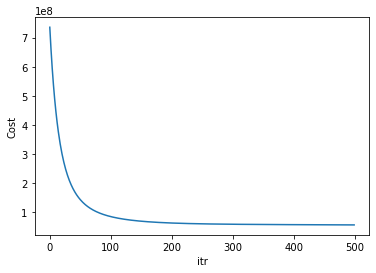

In [136]:
plt.plot(cost_value)
plt.xlabel('itr')
plt.ylabel('Cost')
plt.show()

In [153]:
a = pd.get_dummies(df.sex)

In [154]:
a.shape

(4177, 3)

In [155]:
df.shape

(4177, 9)

In [156]:
df1 = pd.concat([df,a] , axis =1).drop('sex',axis=1)

In [157]:
y = np.array(df1['age-1.5'])
y.shape

(4177,)

In [158]:
df2 = df1.drop('age-1.5',axis=1)

In [159]:
x = np.array(df2)

In [160]:
x.shape

(4177, 10)

In [165]:
# x = (x - np.mean(x)) / np.std(x
x = preprocessing.scale(x)

In [166]:
x = np.c_[x , np.ones(x.shape[0])]

In [167]:
theta = np.ones(x.shape[1])

In [172]:
cost_value = np.zeros((itr,1))
for i in range(itr):
    m = len(y)
    y_pred = np.dot(x ,theta)
    errors = y_pred - y
    slope = (1/m)*(np.dot(x.T,errors))
    theta = theta - lr * slope
    cost = cost_func(x ,y , theta)
    cost_value[i] = cost
    
def score(y_truth , y_pred):
    u = ((y_truth - y_pred)**2).sum()
    v = ((y_truth - y_truth.mean())**2).sum()
    return 1-u/v
print('score : ' , score(y , y_pred))
print('cofficients' , theta)
print('intercept' , theta[-1])
print(cost_value)

score :  0.5367232990153972
cofficients [-0.04432794  1.07536316  0.45093178  3.25577103 -3.89069264 -0.88778032
  1.63270508  1.10330234  0.7196797   1.17232623  1.          9.93368446]
intercept 9.933684462532911
[[42681623.09843914]
 [42680558.07229917]
 [42679494.56731153]
 ...
 [42002243.31741154]
 [42002102.79559056]
 [42001962.46158075]]


In [137]:
alg = LinearRegression()

In [138]:
x_train , x_test , y_train , y_test = train_test_split(x,y)

In [139]:
alg.fit(x_train , y_train)

LinearRegression()

In [140]:
yt_pred = alg.predict(x_train)

In [141]:
y_pred = alg.predict(x_test)

In [145]:
score(y_train,yt_pred)

0.5407487430156581

In [144]:
score(y_test,y_pred)

0.5248907355612217